## Exploratory Data Analysis

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["figure.figsize"] = (10, 8)

In [38]:
train = pd.read_csv("assets/train.csv")
test = pd.read_csv("assets/test.csv")

In [39]:
train.shape, test.shape

((891, 12), (418, 11))

The training dataset has 891 rows (observations) and 12 columns (features) while the test dataset has just under half the number of rows and 11 columns.

In [42]:
train.columns.values, test.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

In [43]:
set(train.columns.values) - set(test.columns.values)

{'Survived'}

The training and test datasets have the same columns except that the test dataset is missing the target column (as expected).

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will have to deal with missing values for Age, Cabin and Embarked.

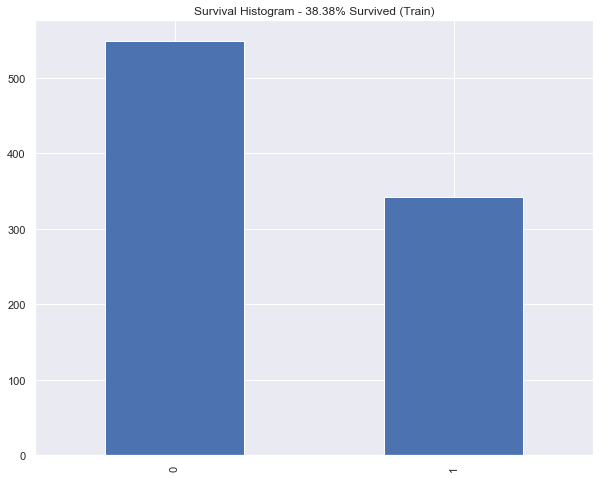

In [52]:
train_survived = train["Survived"].value_counts()
train_s_rate = train_survived[1] / train_survived.sum()

train_survived.plot(kind="bar")
plt.title("Survival Histogram - {:0.2%} Survived (Train)".format(train_s_rate))

plt.show()

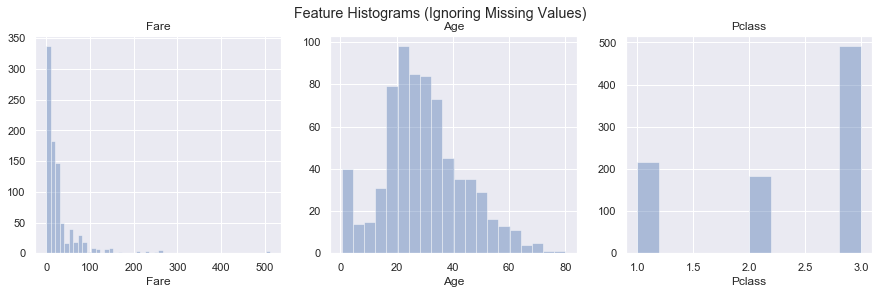

In [75]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

for i, f in enumerate(["Fare", "Age", "Pclass"]):
    sns.distplot(train[f].dropna(), kde=False, ax=axs[i]).set_title(f)

plt.suptitle("Feature Histograms (Ignoring Missing Values)")
plt.show()